In [1]:
import pandas as pd
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import csv
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
api_key = "WMu8MRl34VKMVxFSSntWxGBuU"
api_secret_key = "JsXbtOw8vPog6C6ENu4MvsXbaJfsOJIGLesFZPv64BDu7VSoER"
access_token = "1543097817975377920-PKftQa0U6aANGsIJNvLaitrF54LWjx"
access_token_secret_key = "riQfrSaQEiNP0CpVNYHRz4Axk6OPn9GdTIRHaAFqco7hC"

In [3]:
from pickle import TRUE


auth = tweepy.OAuthHandler(api_key, api_secret_key)
auth.set_access_token(access_token,access_token_secret_key)

api = tweepy.API(auth, wait_on_rate_limit= TRUE)

In [4]:
username = api.user_timeline(id ="wtf1official", count = 200)
keywords =  api.search_tweets(q="arema", count = 200, lang ="en")

Unexpected parameter: id


In [6]:
for tweet in username :
  print(tweet.text)

Goatifi found a new Suzuka layout in FP2 🐐 #JapaneseGP https://t.co/7ZaMOd3ckL
Well, that’s a new one 😳😂 #JapaneseGP  https://t.co/4rMXk3hUNt
You get a P1! You get a P1! You get a P1! https://t.co/6aBfEHb0TL
There’s no Toto in the paddock this weekend #JapaneseGP  https://t.co/P4doYx1CwY
McLaren: “How’s the track?”
Norris: “Wet.”

#JapaneseGP
What has Christian Horner just seen? Wrong answers only... #JapaneseGP https://t.co/SNRDa4LCLu
Mick Schumacher won’t be taking part in FP2 after destroying his car earlier in the day #JapaneseGP… https://t.co/ORPQpLs9Z4
FP2 is here and there’s 90 minutes worth of running. Pirelli should’ve been completing a tyre test which has now been cancelled #JapaneseGP
Oh, Mick 💔 "Just had a huge aquaplane," he tells the team. He's made contact with the barriers right at the end of… https://t.co/STrvxaUpfR
👀 #JapaneseGP https://t.co/sdUCKQ81qx
How life feels as a Ferrari fan in 2022 #JapaneseGP https://t.co/cJthFEkG4B
Aaaaaand everyone is now in the pits or t

In [7]:
 for tweet in keywords :
  print(tweet.text)

@GOAL_ID supporter arema : https://t.co/8Cy08H6x5B
RT @washingtonpost: At 9:39 p.m. on Saturday, the game between Arema FC and Persebaya Surabaya ended. Most spectators were Arema FC fans, w…
RT @washingtonpost: At 9:39 p.m. on Saturday, the game between Arema FC and Persebaya Surabaya ended. Most spectators were Arema FC fans, w…
RT @rizkyboncell: 1927 1928 1933 1987 and more!

#UsutTuntas #SepakatDamai https://t.co/tSG1p6QXb5
RT @firzieidris: The head of Arema FC match hosting committee Abdul Haris faces the media this afternoon. With tears running down his eyes,…
RT @washingtonpost: At 9:39 p.m. on Saturday, the game between Arema FC and Persebaya Surabaya ended. Most spectators were Arema FC fans, w…
The head of Arema FC match hosting committee Abdul Haris faces the media this afternoon. With tears running down hi… https://t.co/uPGqu97wwy
RT @JesWashington: This week, we met Arema Apache members. 'Our friends died. 2 men and 1 woman. When we bought tickets, we never thought t…
RT @

In [8]:
df = pd.DataFrame([tweet.text for tweet in keywords], columns=['Tweets'])
df.head()

,Tweets
0,@GOAL_ID supporter arema : https://t.co/8Cy08H...
1,"RT @washingtonpost: At 9:39 p.m. on Saturday, ..."
2,"RT @washingtonpost: At 9:39 p.m. on Saturday, ..."
3,RT @rizkyboncell: 1927 1928 1933 1987 and more...
4,RT @firzieidris: The head of Arema FC match ho...


In [40]:
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) 
 text = re.sub('#', '', text) 
 text = re.sub('RT[\s]+', '', text) 
 text = re.sub('https?:\/\/\S+', '', text) 
 
 return text

df['Tweets'] = df['Tweets'].apply(cleanTxt)

df

,Tweets
0,: Criticism is growing over the police respons...
1,: The coach of the Indonesian soccer team Arem...
2,: Greeting Indonesia Police\nStopPoliceBrutali...
3,: The coach of the Indonesian soccer team Arem...
4,: Greeting Indonesia Police\nStopPoliceBrutali...
...,...
95,: The coach of the Indonesian soccer team Arem...
96,1998: Go to hell Indonesian Police..\nRIDamaiT...
97,: Greeting Indonesia Police\nStopPoliceBrutali...
98,": Following a league match against Persebaya, ..."


In [41]:

def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity


def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)


df

,Tweets,Subjectivity,Polarity
0,: Criticism is growing over the police respons...,0.400000,-0.200000
1,: The coach of the Indonesian soccer team Arem...,0.000000,0.000000
2,: Greeting Indonesia Police\nStopPoliceBrutali...,0.000000,0.000000
3,: The coach of the Indonesian soccer team Arem...,0.000000,0.000000
4,: Greeting Indonesia Police\nStopPoliceBrutali...,0.000000,0.000000
...,...,...,...
95,: The coach of the Indonesian soccer team Arem...,0.000000,0.000000
96,1998: Go to hell Indonesian Police..\nRIDamaiT...,0.000000,0.000000
97,: Greeting Indonesia Police\nStopPoliceBrutali...,0.000000,0.000000
98,": Following a league match against Persebaya, ...",0.166667,-0.166667


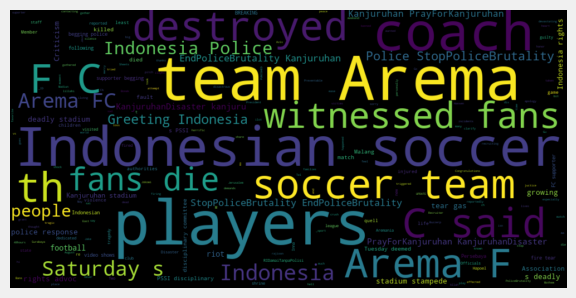

In [48]:
words = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=1000, height=500, random_state=21, max_font_size=110).generate(words)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [44]:
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

In [46]:
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,: Criticism is growing over the police respons...,0.400000,-0.200000,Negative
1,: The coach of the Indonesian soccer team Arem...,0.000000,0.000000,Neutral
2,: Greeting Indonesia Police\nStopPoliceBrutali...,0.000000,0.000000,Neutral
3,: The coach of the Indonesian soccer team Arem...,0.000000,0.000000,Neutral
4,: Greeting Indonesia Police\nStopPoliceBrutali...,0.000000,0.000000,Neutral
...,...,...,...,...
95,: The coach of the Indonesian soccer team Arem...,0.000000,0.000000,Neutral
96,1998: Go to hell Indonesian Police..\nRIDamaiT...,0.000000,0.000000,Neutral
97,: Greeting Indonesia Police\nStopPoliceBrutali...,0.000000,0.000000,Neutral
98,": Following a league match against Persebaya, ...",0.166667,-0.166667,Negative


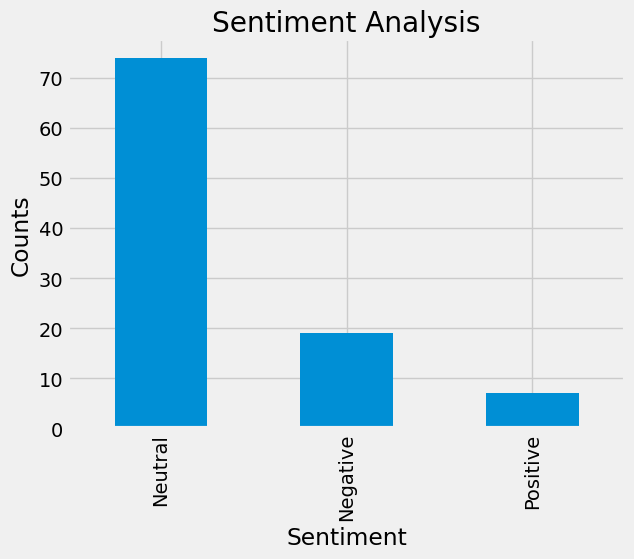

In [47]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()
